# Simple quantitative analyses

The purpose of this notebook is to show the simplicity of doing
quantitative analyses with the xroms framework.

In [1]:
import matplotlib.pyplot as plt
import xroms
%matplotlib inline

In [2]:
# Initiate the Dataset
A = xroms.roms_dataset("ocean_avg_0014.nc")

In [3]:
# Make a DataArray of the grid cell areas
area = 0.001/A.pm * 0.001/A.pn
area.attrs = dict(long_name='grid cell area', units='km^2')

In [4]:
# Physical sizes
sea_area = area.where(A.mask_rho > 0).sum()
land_area = area.where(A.mask_rho < 1).sum()

#H = A.h.where(A.mask_rho > 0)   # Bathymetry at sea
# area50 = area.where(H < 50).sum()
area50 = area.where((A.mask_rho > 0) & (A.h < 50)).sum()
area50plus = area.where(A.h >= 50).sum()

print(f"Total area                   = {float(area.sum()):10.2f}")
print(f"Sea area                     = {float(sea_area):10.2f}")
print(f"Land area                    = {float(land_area):10.2f}")
print(f"Sea area shallower than 50 m = {float(area50):10.2f}")
print(f"Sea area deeper than 50 m    = {float(area50plus):10.2f}")

Total area                   = 2340062.86
Sea area                     = 1699476.93
Land area                    =  640585.93
Sea area shallower than 50 m =  392411.48
Sea area deeper than 50 m    = 1307065.45


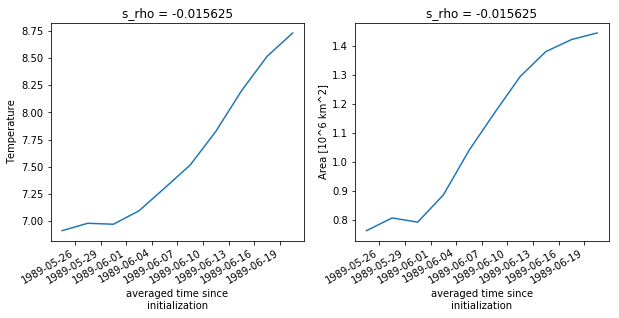

In [5]:
# Sea Surface Temperature
SST = A.temp.isel(s_rho=-1)

# Time evolution of spatial mean SST
SSTmean = SST.mean(('eta_rho', 'xi_rho'))
SSTmean.attrs = dict(standard_name='Temperature')

# Area with SST higher than 10 degrees
A10 = area.where(SST > 10).sum(('eta_rho', 'xi_rho'))
A10 = 1e-6 * A10
A10.attrs = dict(units='10^6 km^2', long_name='Area')

# Plot
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
SSTmean.plot(ax=axes[0])
A10.plot(ax=axes[1]);